<a href="https://colab.research.google.com/github/AlexanderPr03/ML/blob/main/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

In [4]:
df = pd.read_csv('immo_data.csv')

In [5]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


<Axes: >

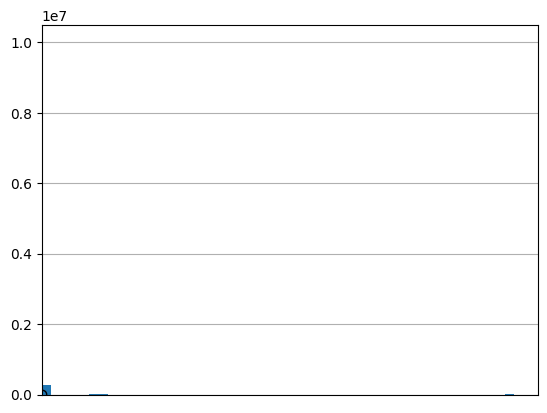

In [6]:
df['baseRent'].hist(bins=50)
df.boxplot(column=['baseRent'])

In [7]:
df.duplicated().sum()

0

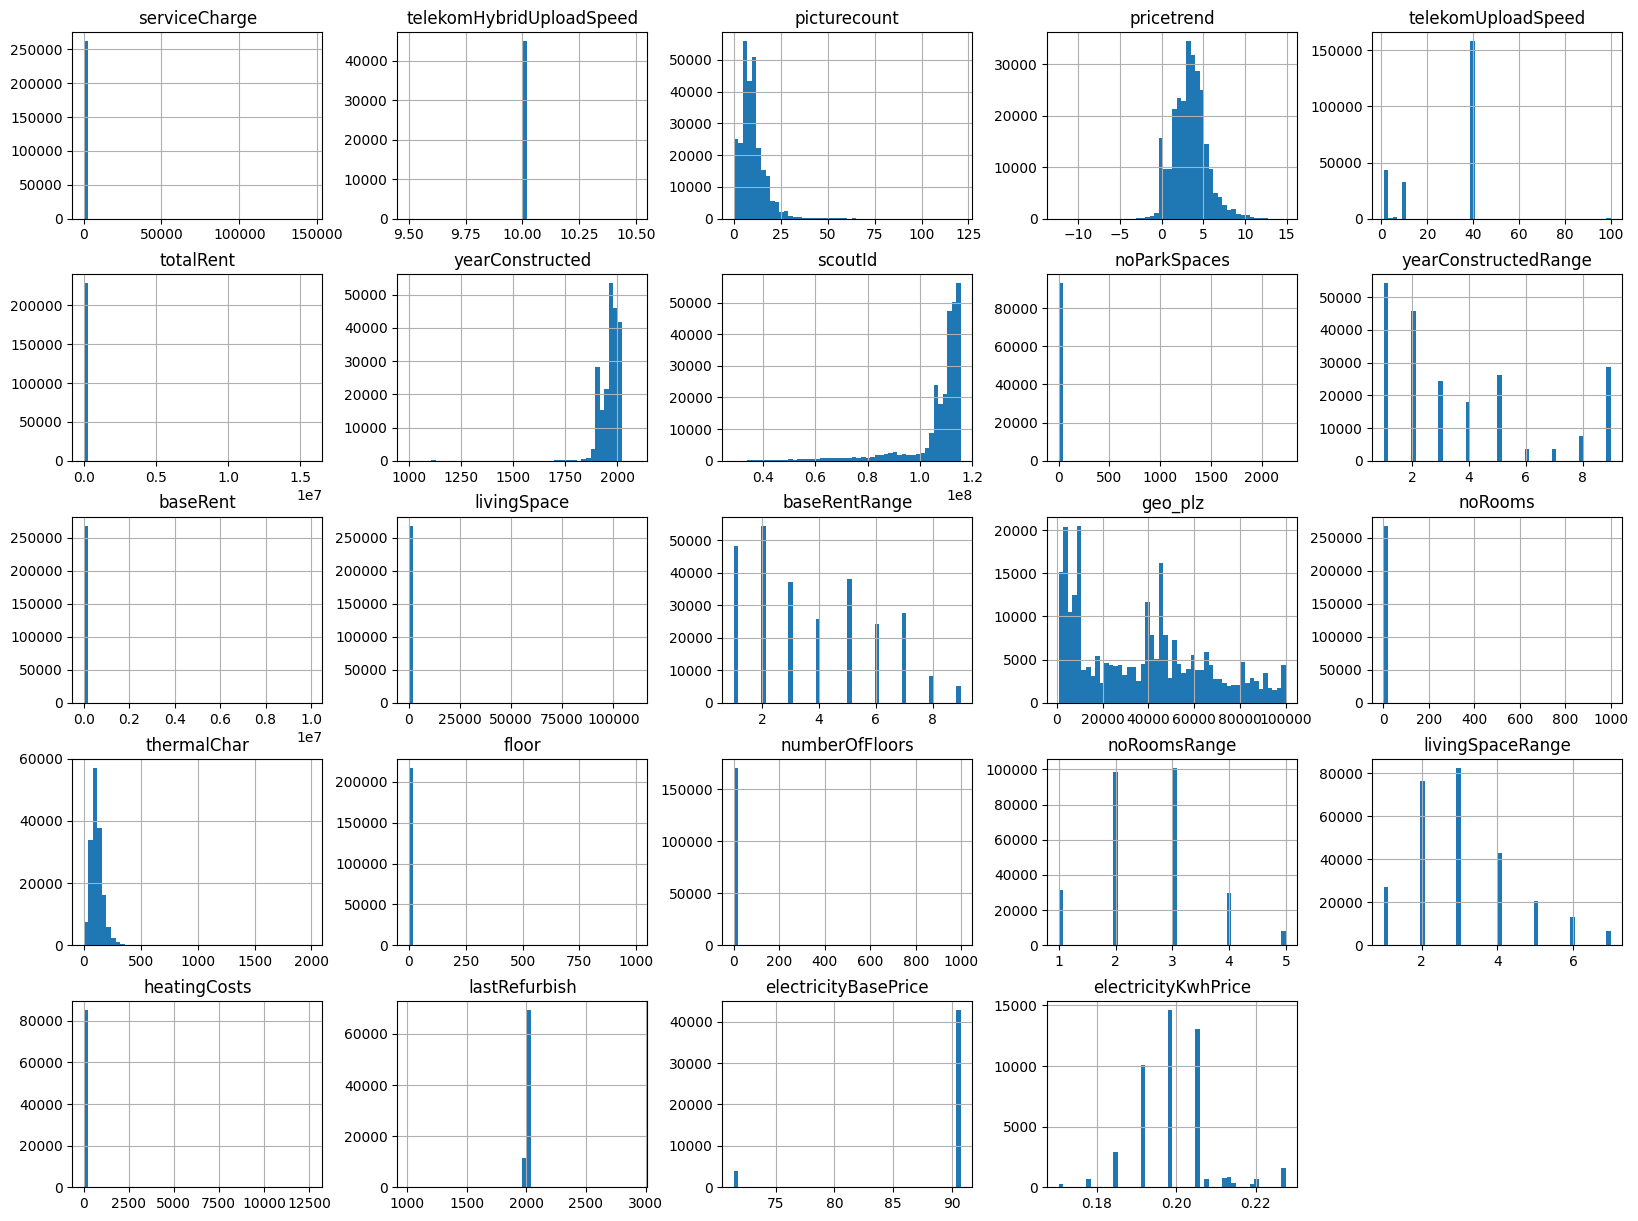

<Axes: xlabel='livingSpace', ylabel='baseRent'>

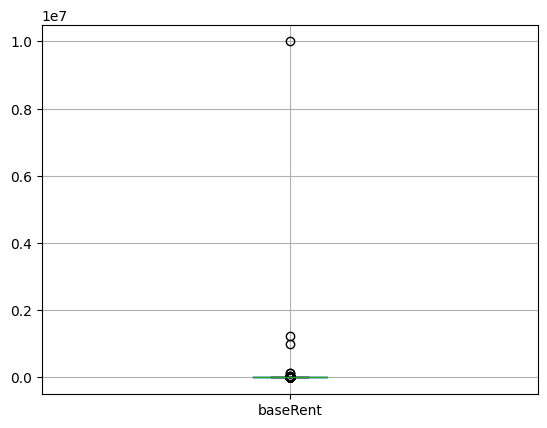

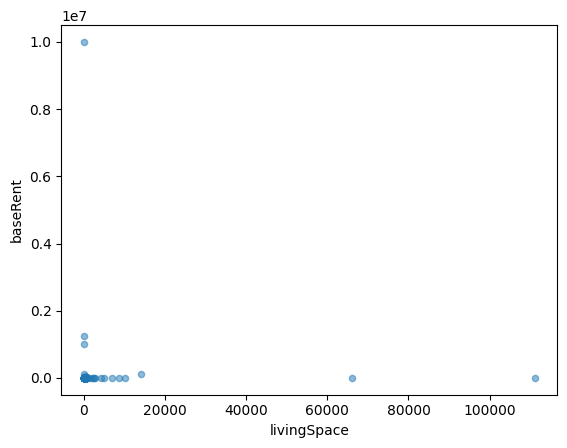

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()
df.boxplot(column=['baseRent'])
df.plot(kind='scatter', x='livingSpace', y='baseRent', alpha=0.5)

<ipython-input-9-2f981eab34ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


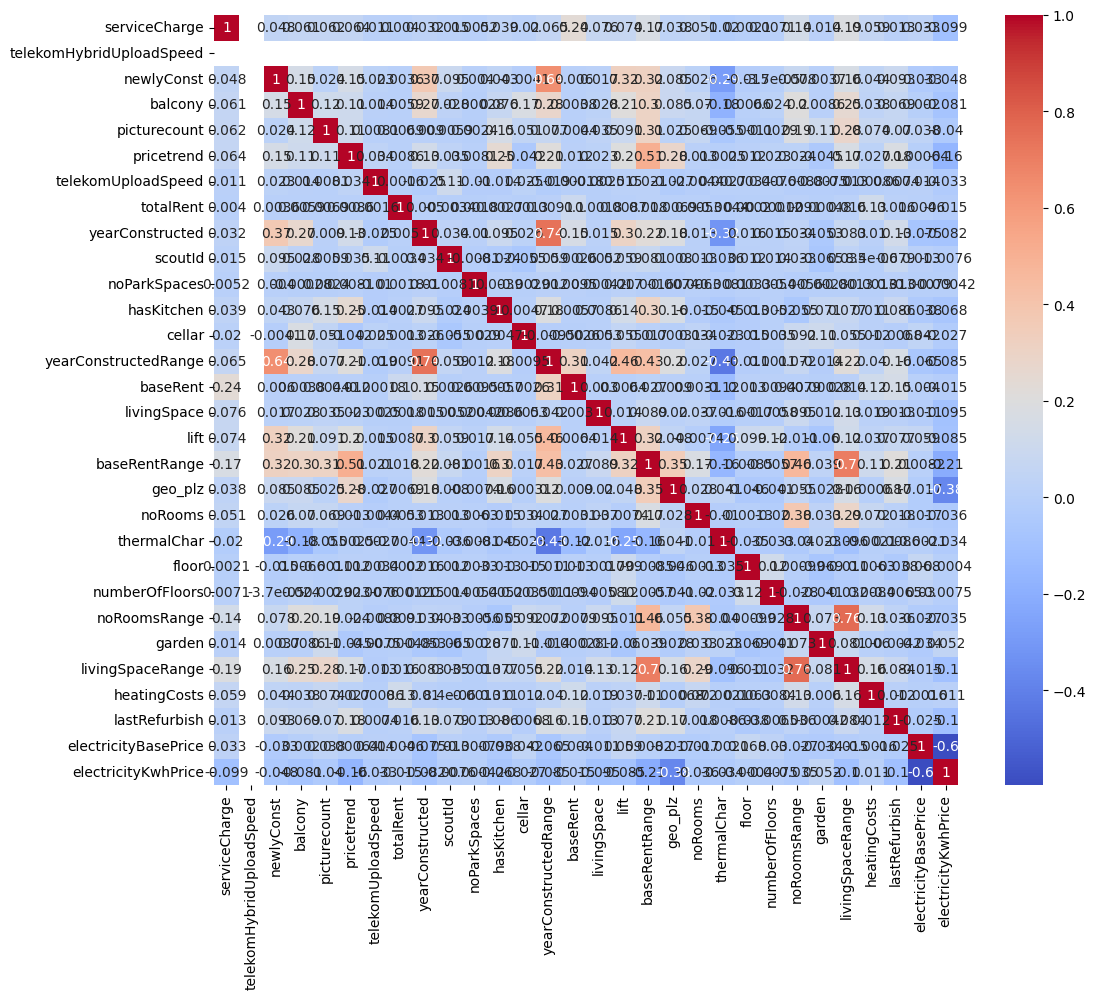

In [9]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [10]:
df.duplicated().sum()

0

In [11]:
le = LabelEncoder()
df = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna('Absent')
        df[col] = le.fit_transform(df[col])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Nr Outliers cu Isolation Forest:  26885


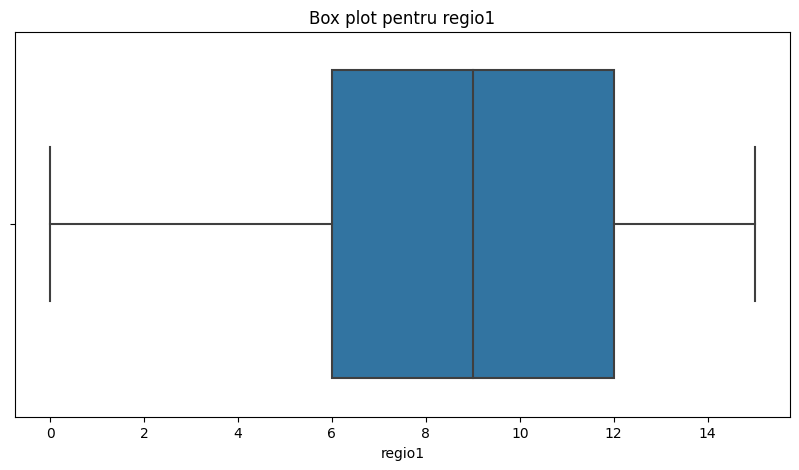

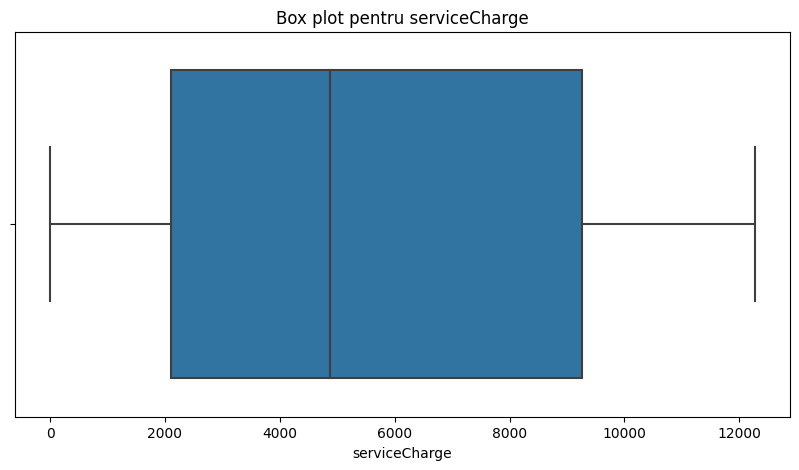

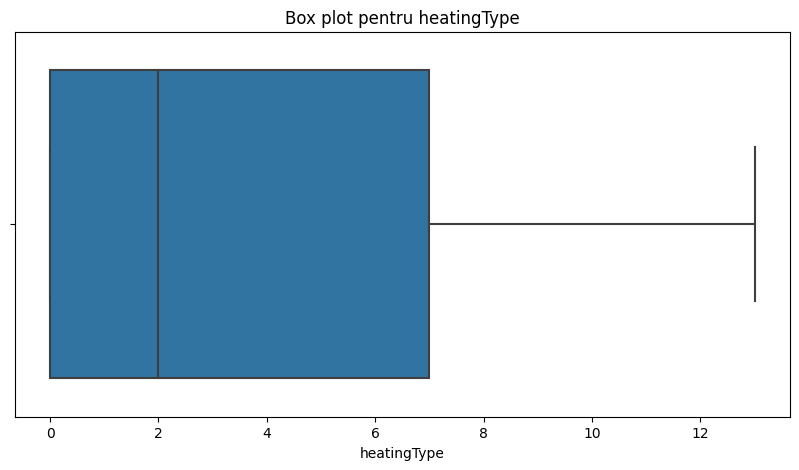

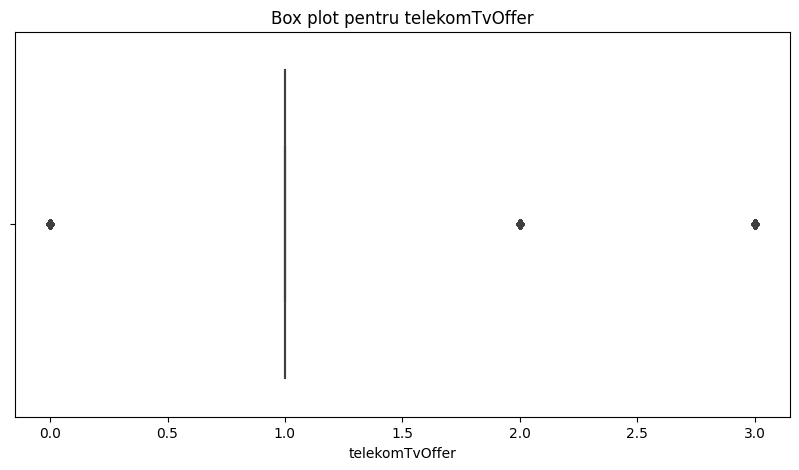

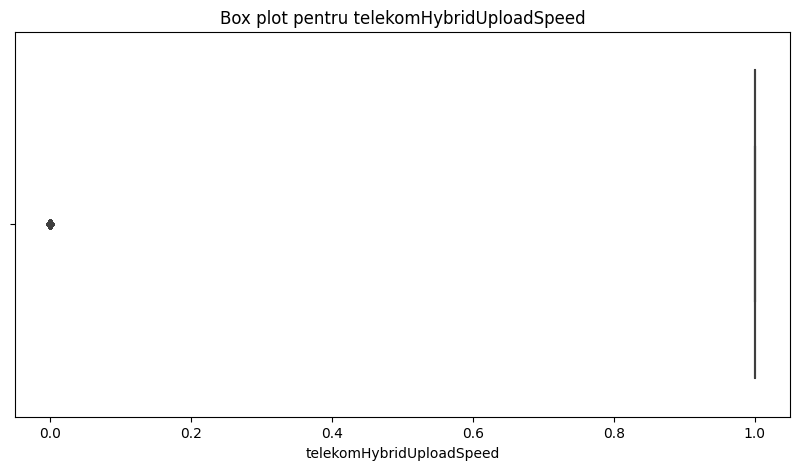

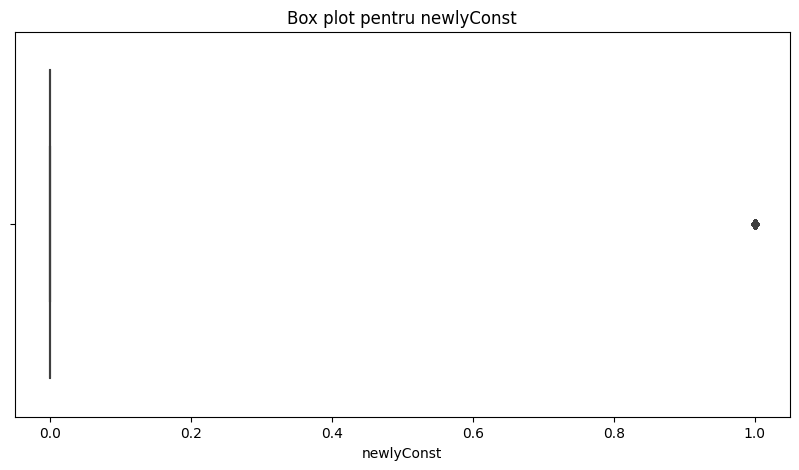

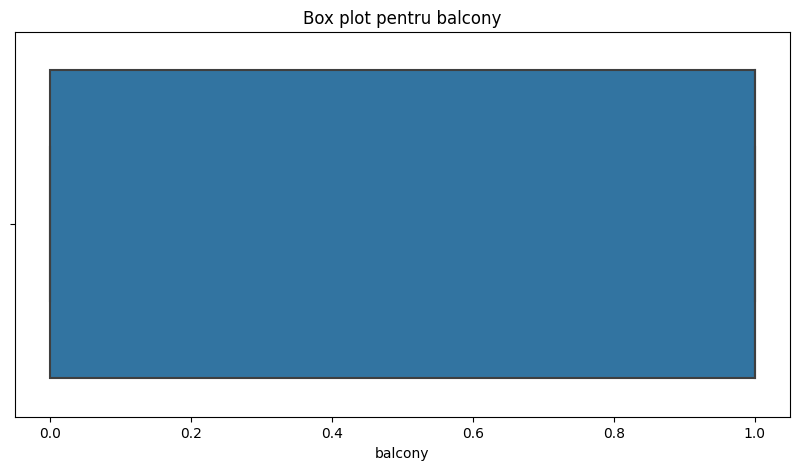

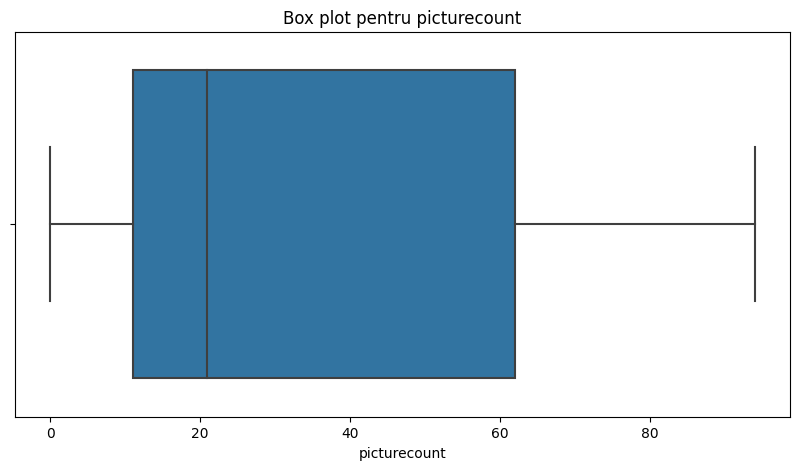

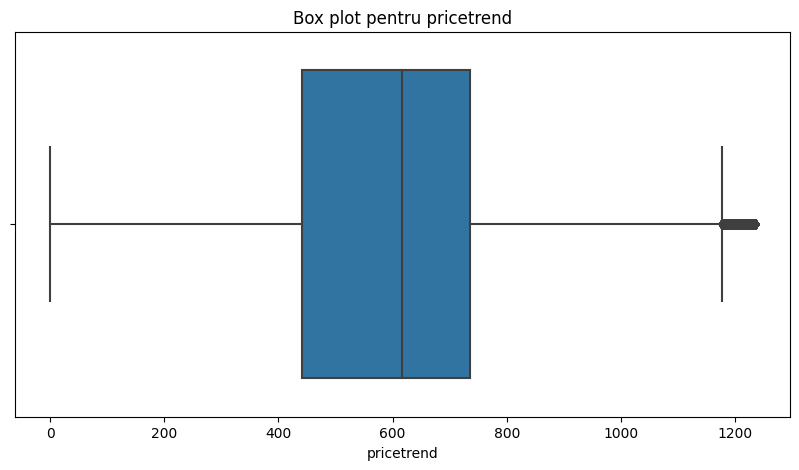

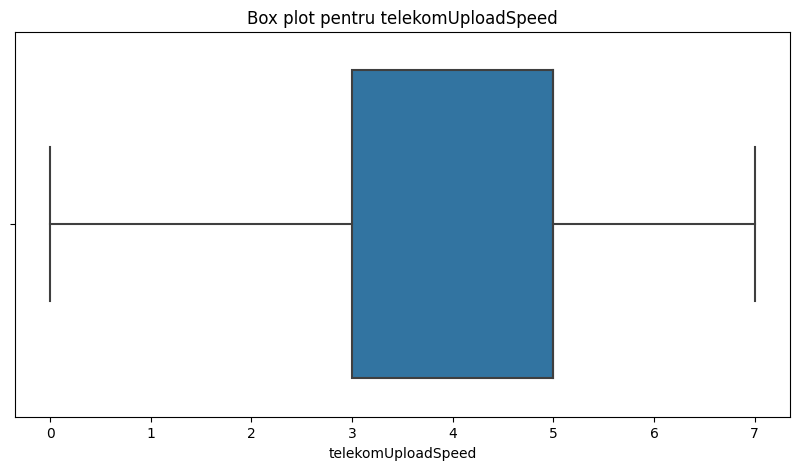

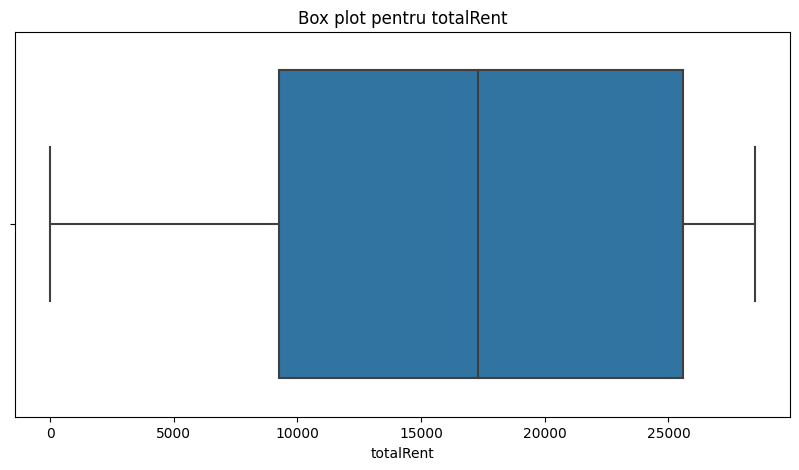

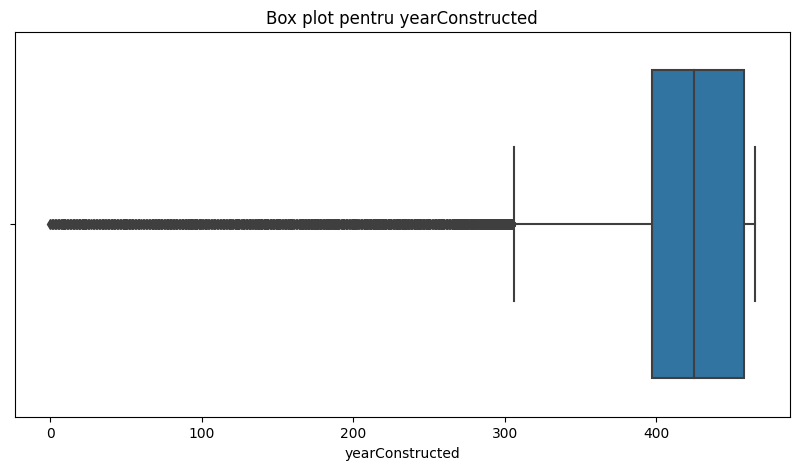

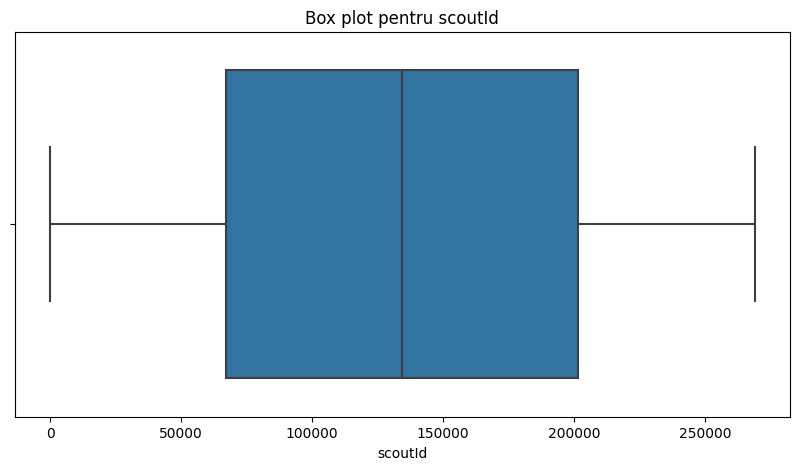

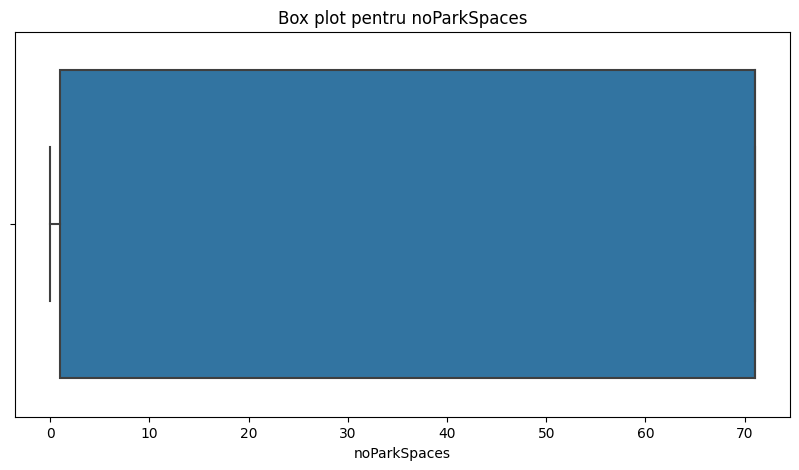

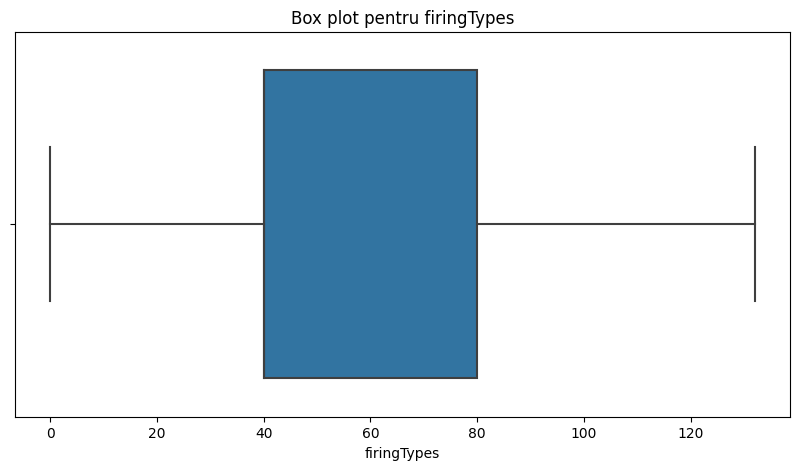

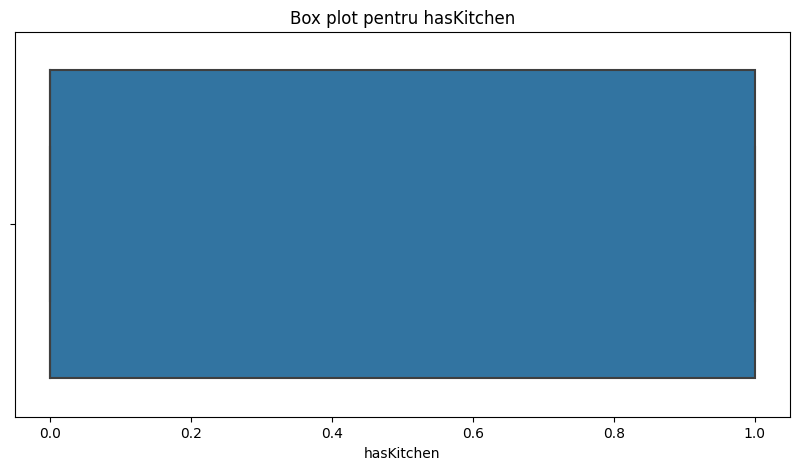

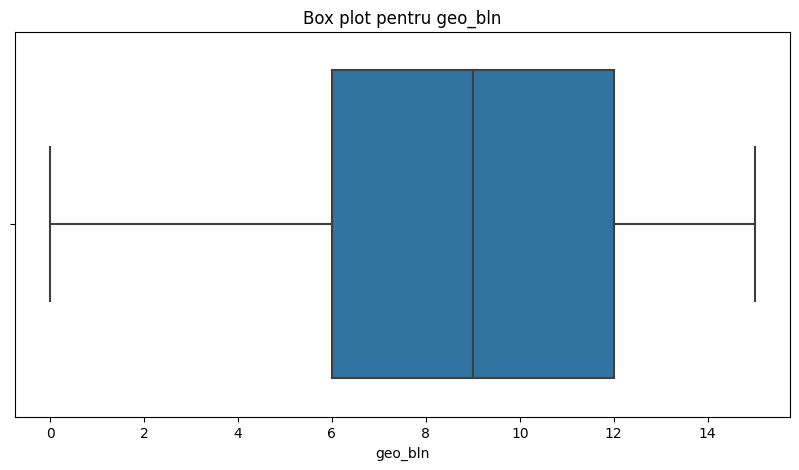

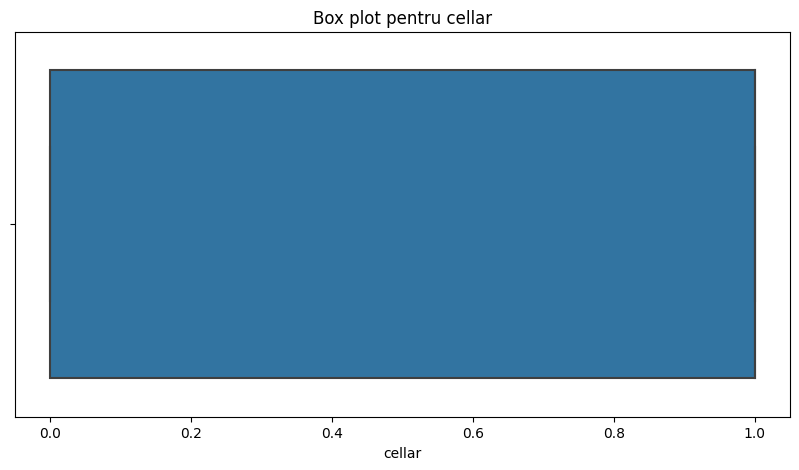

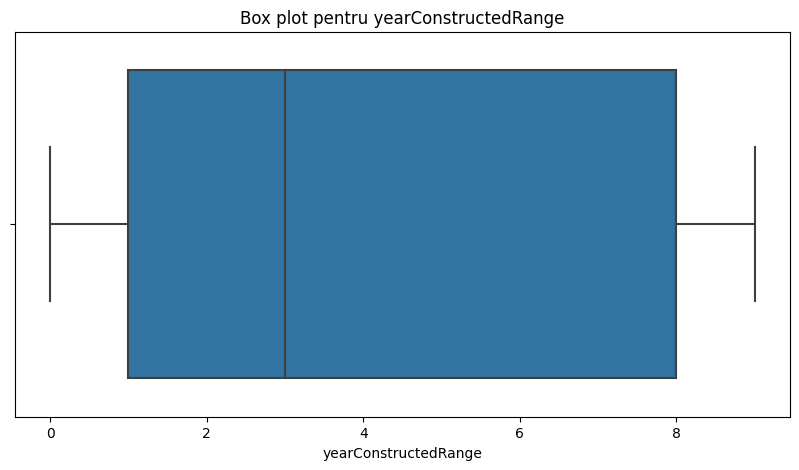

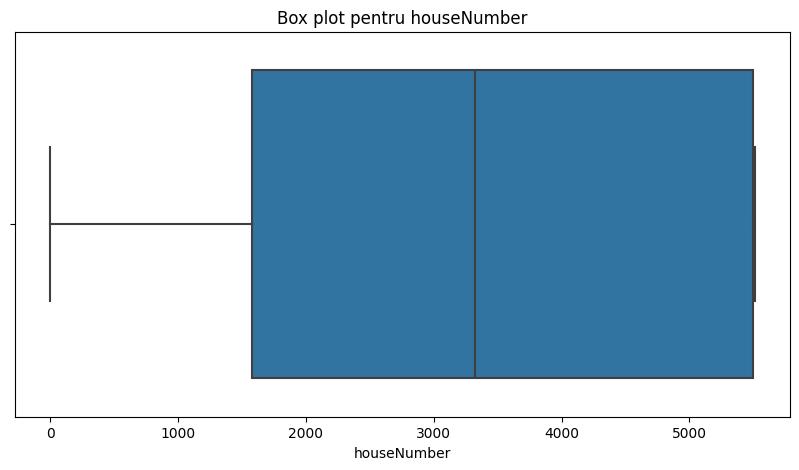

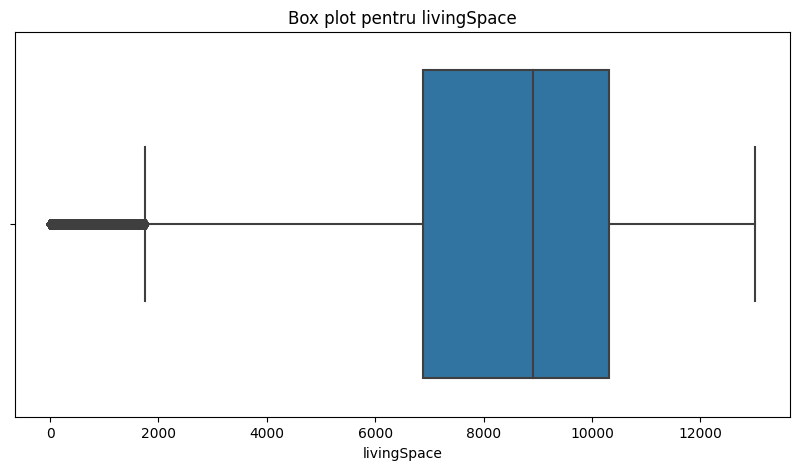

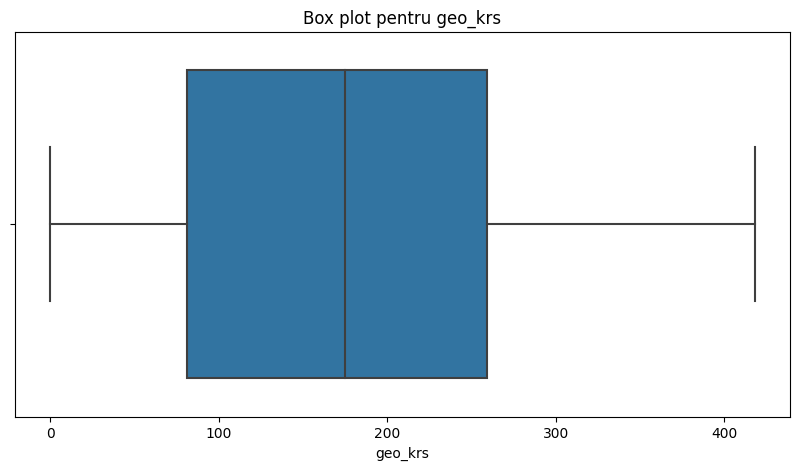

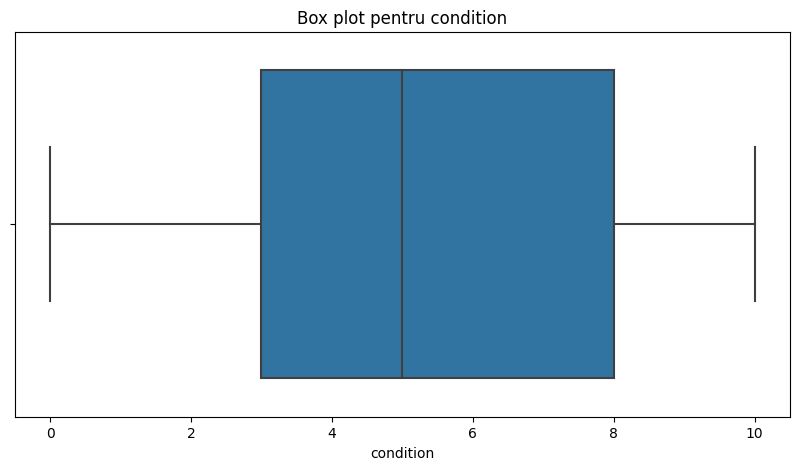

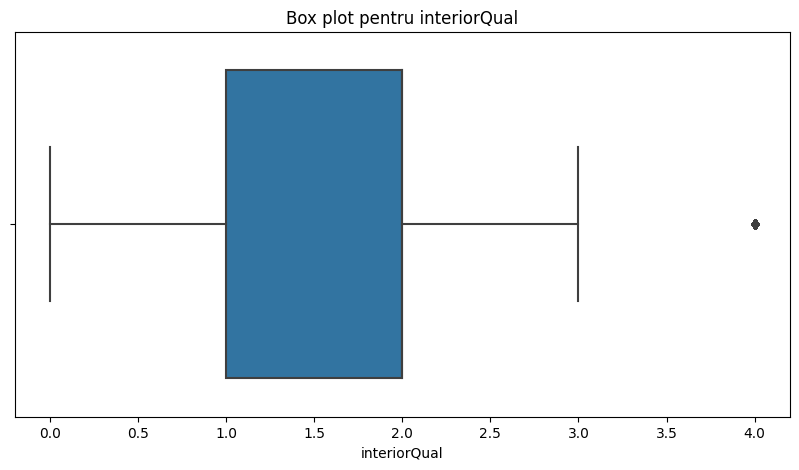

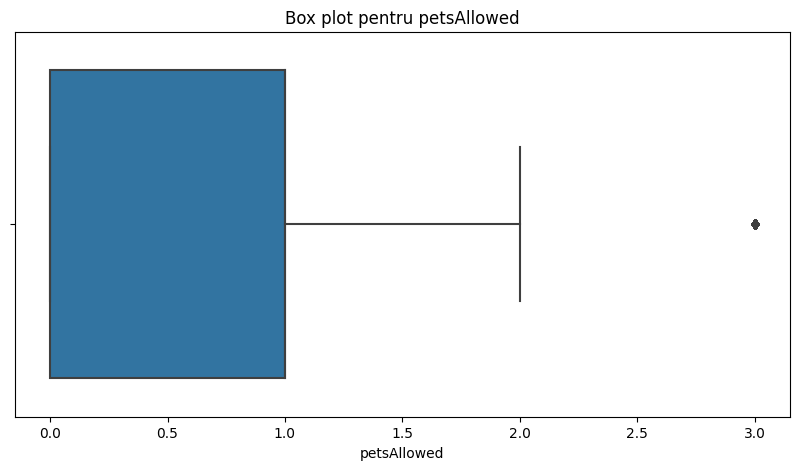

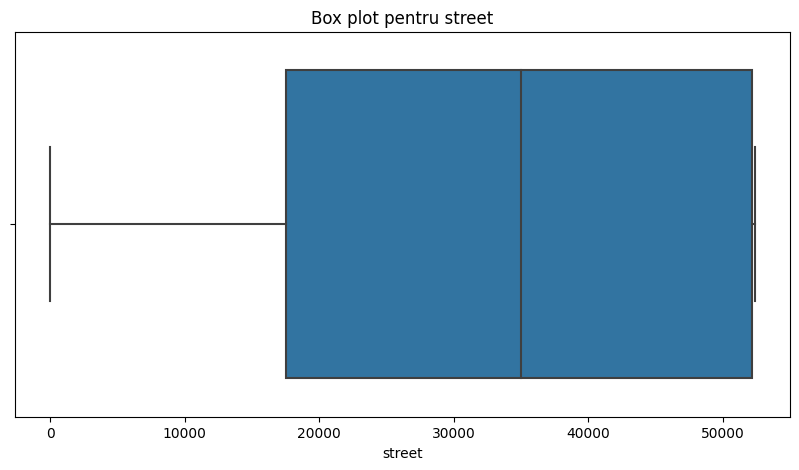

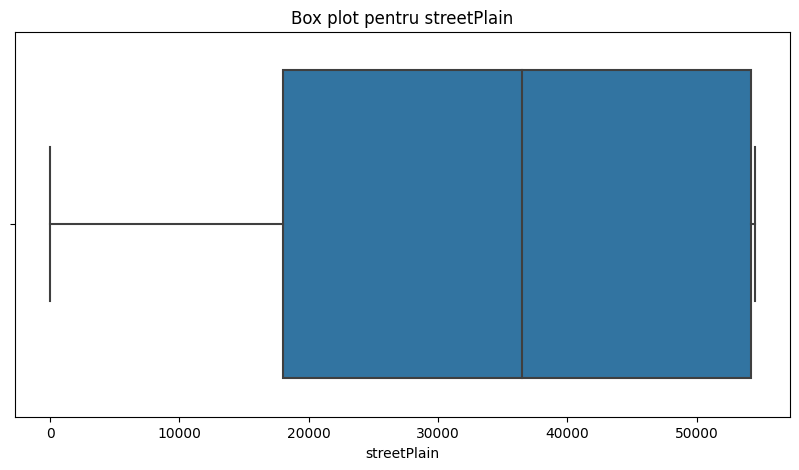

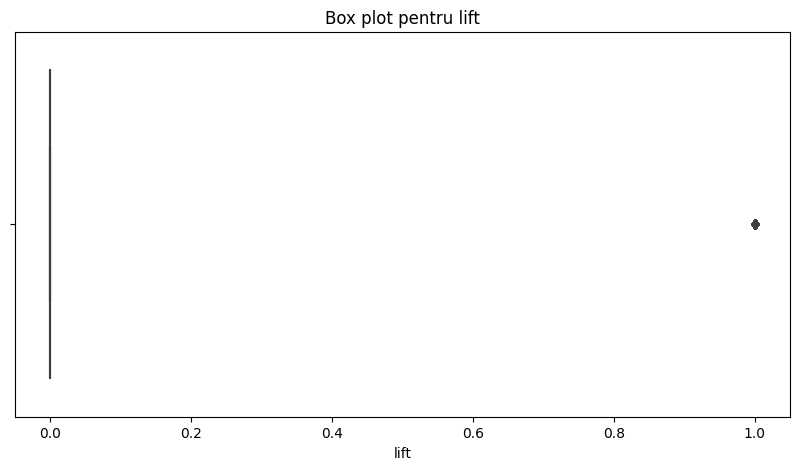

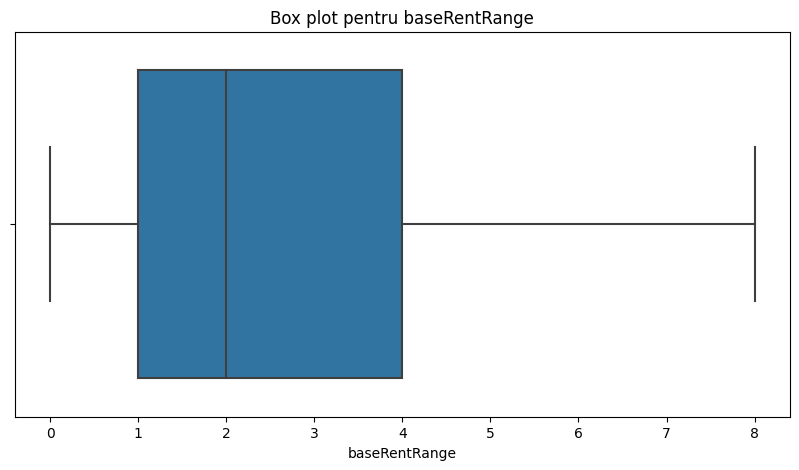

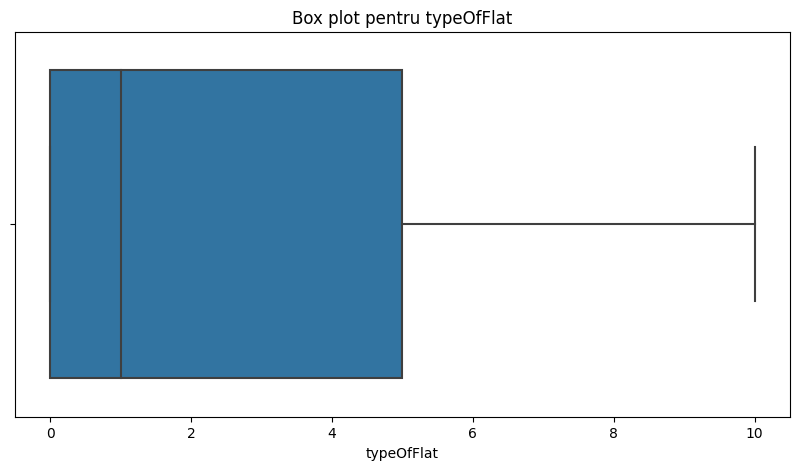

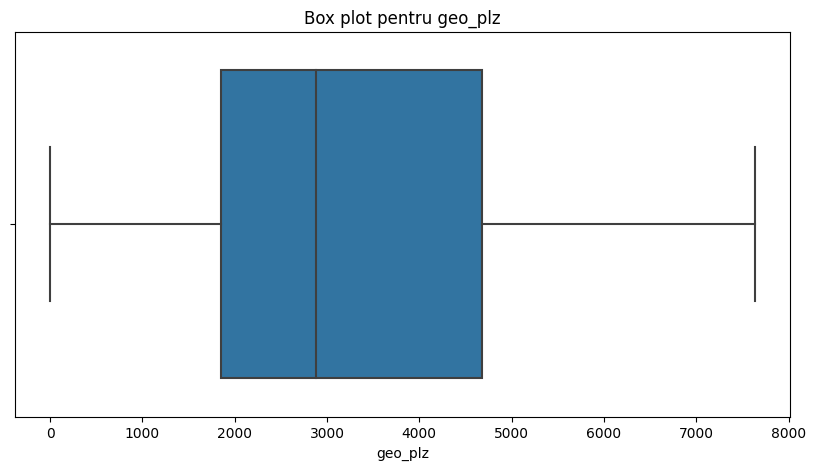

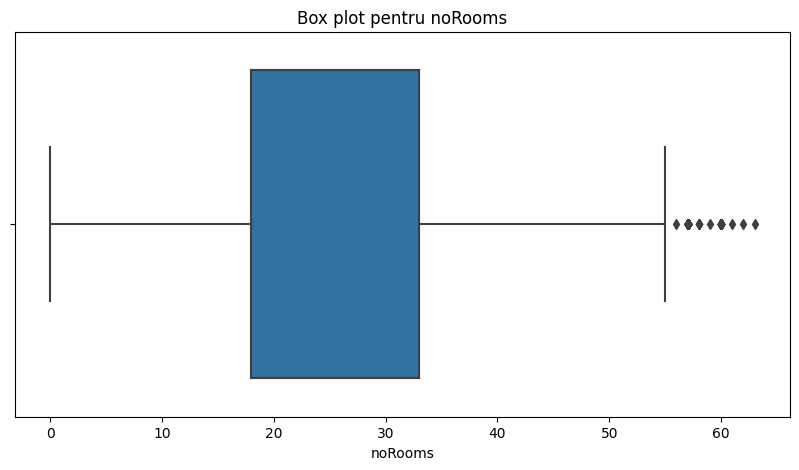

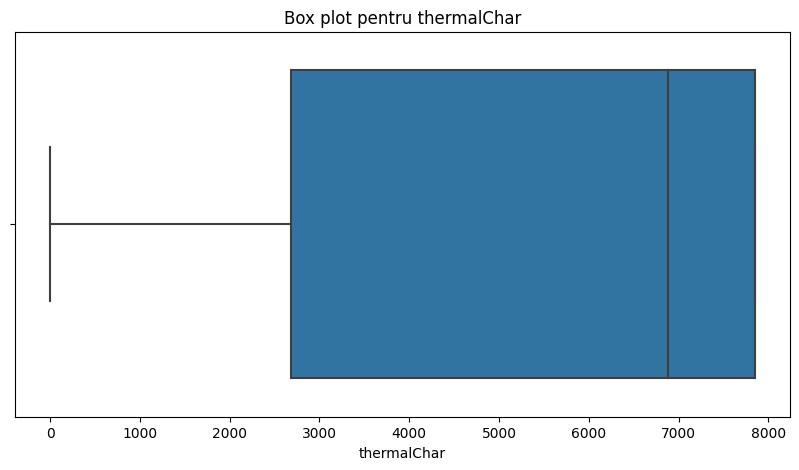

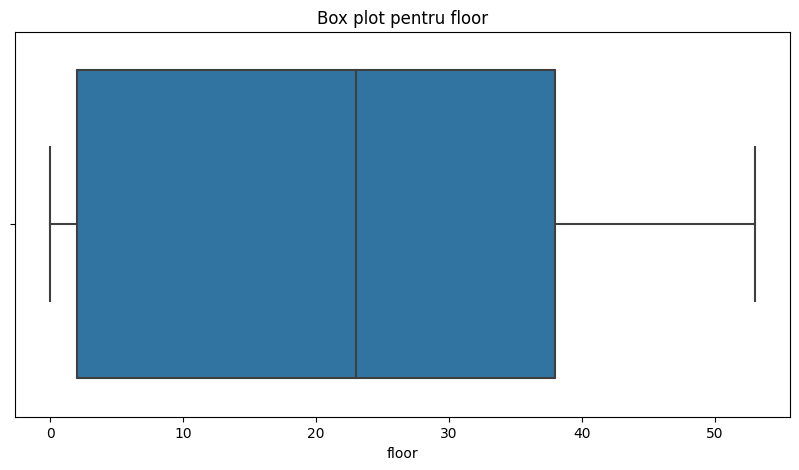

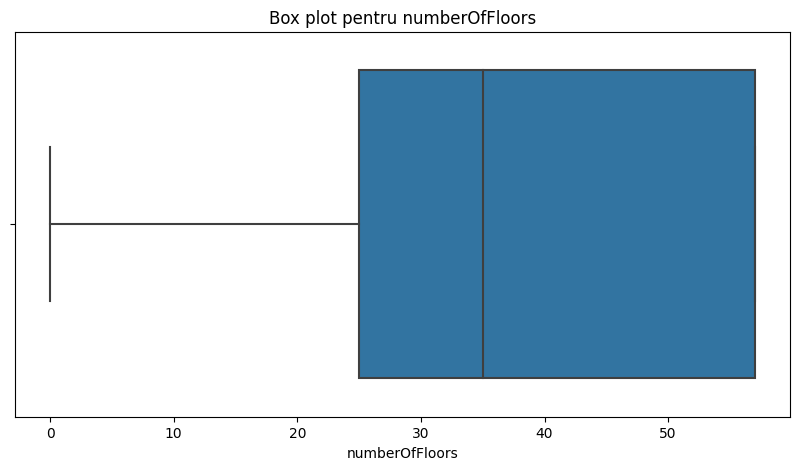

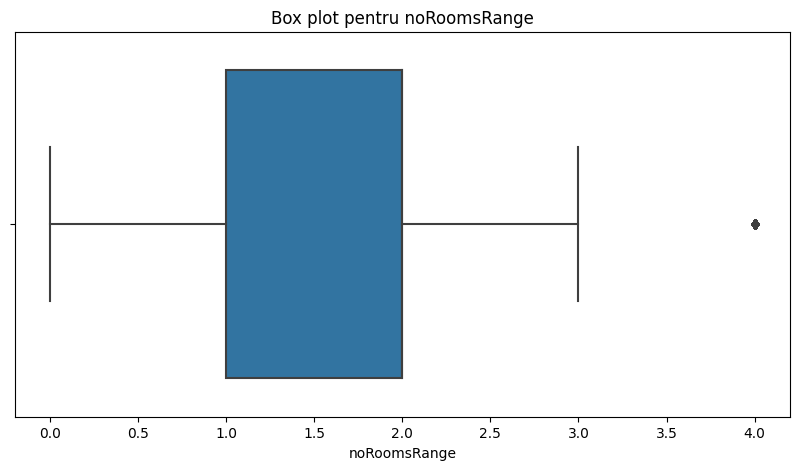

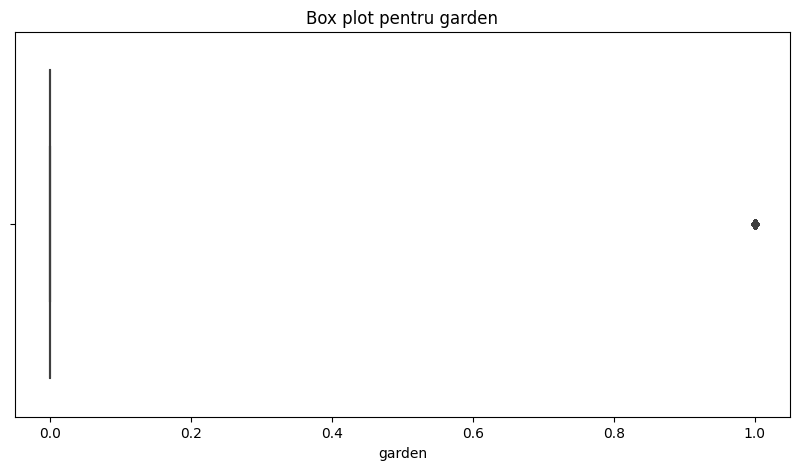

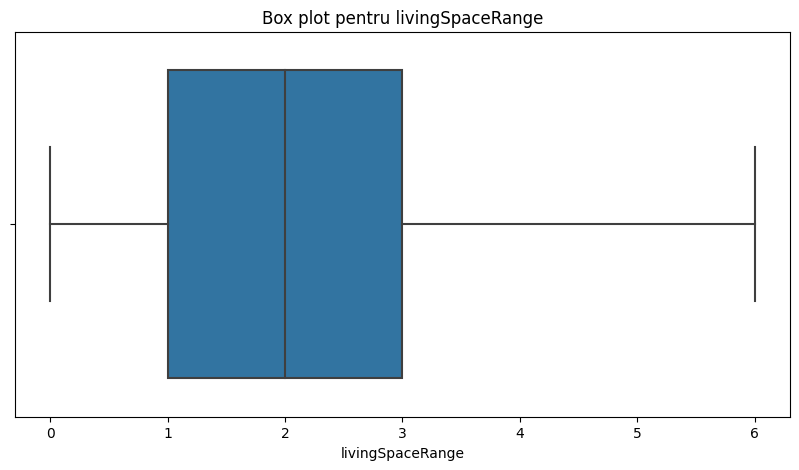

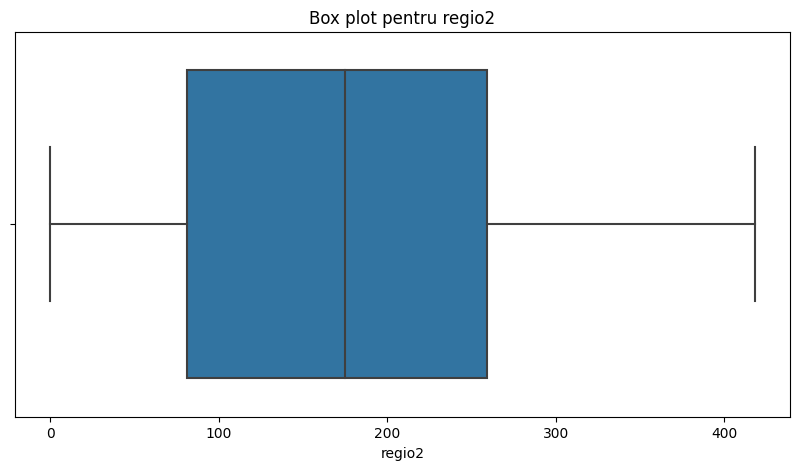

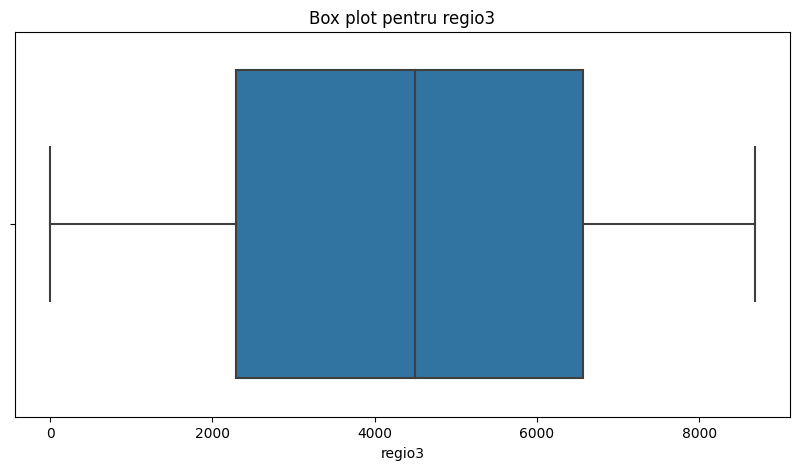

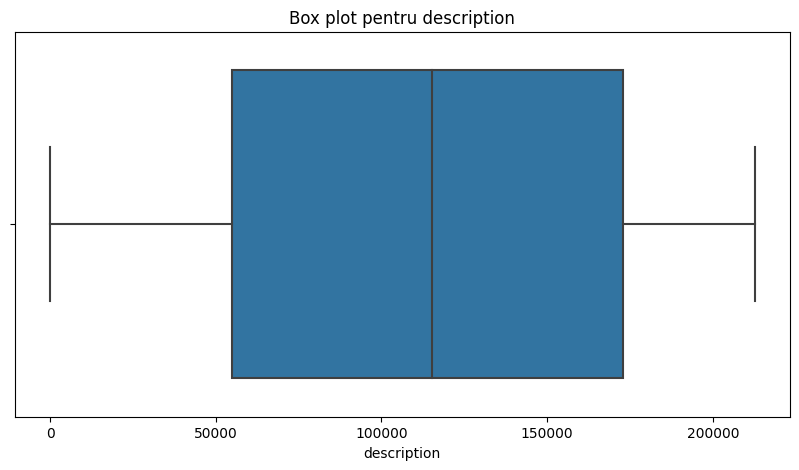

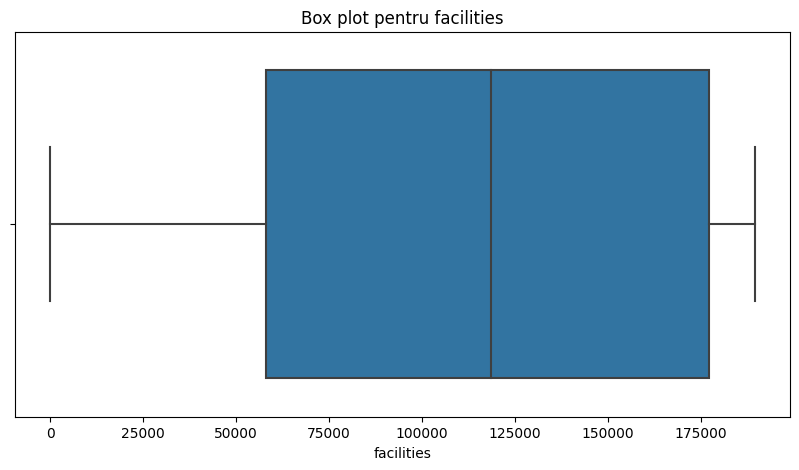

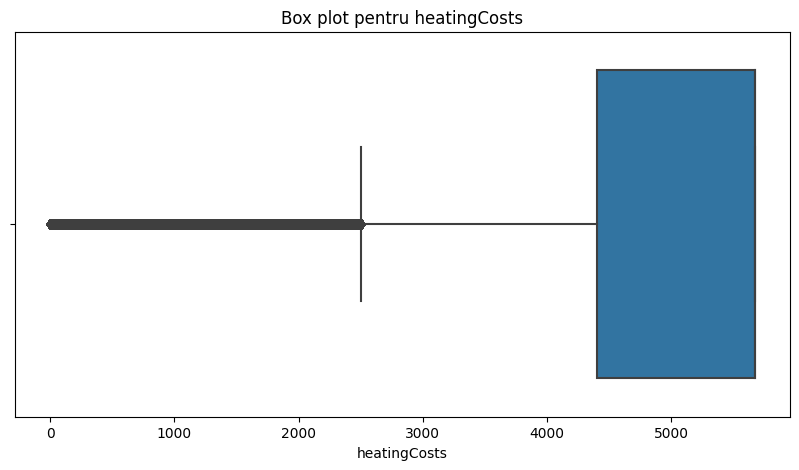

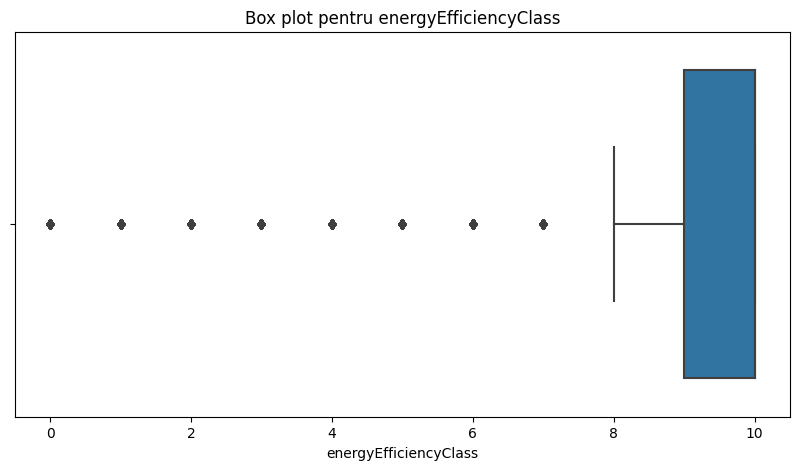

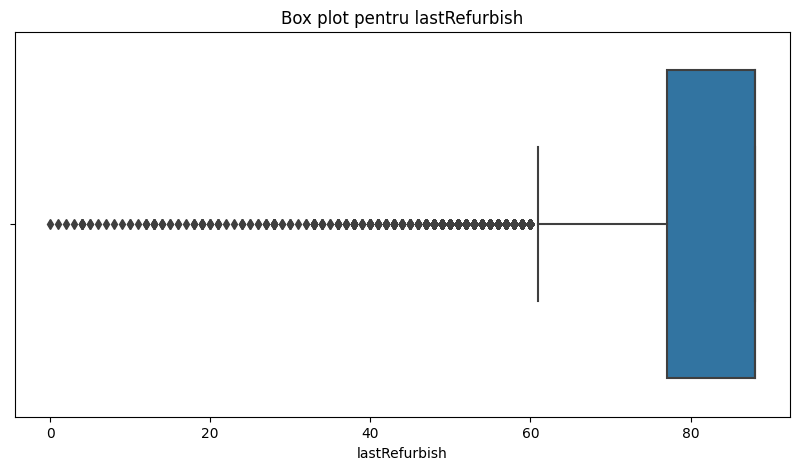

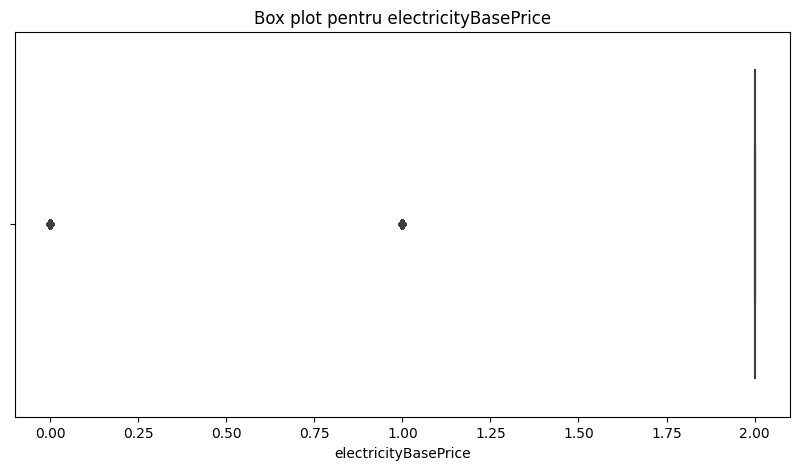

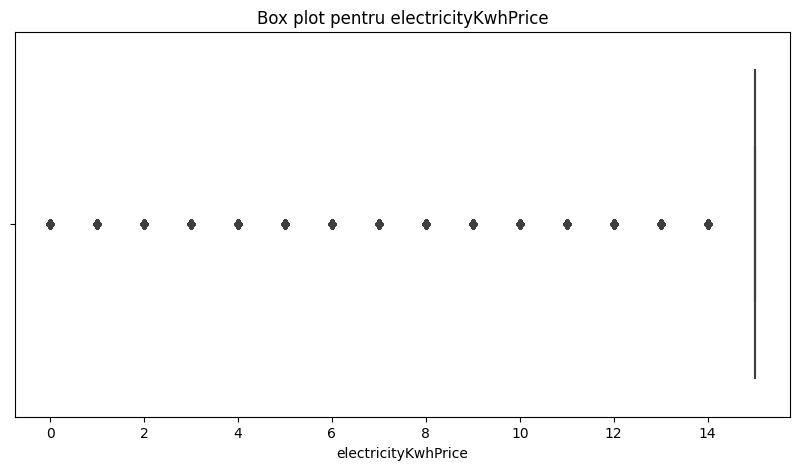

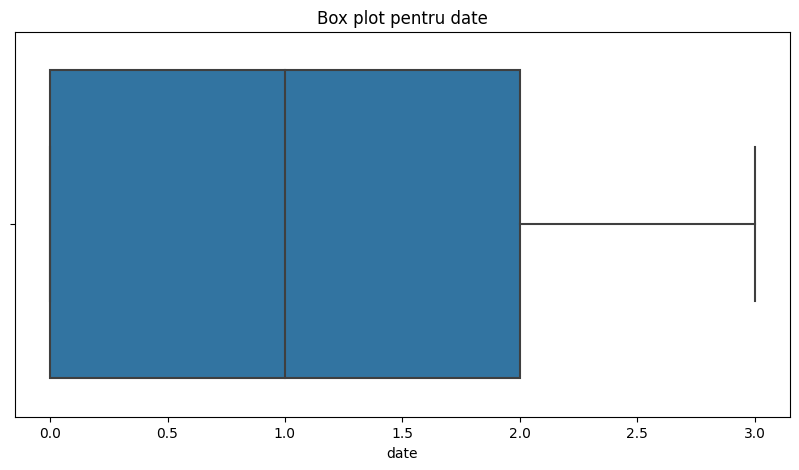

In [12]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('baseRent')

# Isolation Forest
iso = IsolationForest(contamination=0.1)
outliers_iso = iso.fit_predict(df[numerical_cols])
# df['outliers_iso'] = outliers_iso
print("Nr Outliers cu Isolation Forest: ", list(outliers_iso).count(-1))

# # Elliptic Envelope
# ee = EllipticEnvelope(contamination=0.1,support_fraction=0.7)
# outliers_ee = ee.fit_predict(df[numerical_cols])
# # df['outliers_ee'] = outliers_ee
# print("Nr Outliers cu Elliptic Envelope: ", list(outliers_ee).count(-1))


# # Local Outlier Factor
# lof = LocalOutlierFactor()
# outliers_lof = lof.fit_predict(df[numerical_cols])
# # df['outliers_lof'] = outliers_lof
# print("Nr. Outliers cu Local Outlier Factor: ", list(outliers_lof).count(-1))


# 4. Box plot pentru fiecare valoare numerica
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot pentru {col}')
    plt.show()

In [13]:
models = {
    'RandomForest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'SVC': SVR()
}

df_simple = df.copy()
df_knn = df.copy()
df_mice = df.copy()

imputer = SimpleImputer(strategy='mean')
df_simple_imputed = pd.DataFrame(imputer.fit_transform(df_simple))
df_simple_imputed.columns = df_simple.columns
df_simple_imputed.index = df_simple.index

imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_knn))
df_knn_imputed.columns = df_knn.columns
df_knn_imputed.index = df_knn.index

imputer = IterativeImputer(random_state=0)
df_mice_imputed = pd.DataFrame(imputer.fit_transform(df_mice))
df_mice_imputed.columns = df_mice.columns
df_mice_imputed.index = df_mice.index

In [17]:
# for model_name, model in models.items():
#     print(f'\nModel: {model_name}\n')

#     if model_name == 'SVC':
#         scaler = StandardScaler()
#         df_simple['baseRent'] = scaler.fit_transform(df_simple[['baseRent']])
#         df_knn['baseRent'] = scaler.fit_transform(df_knn[['baseRent']])
#         df_mice['baseRent'] = scaler.fit_transform(df_mice[['baseRent']])

#     #SimpleImputer
#     # scores_simple = cross_val_score(model, df_simple_imputed.drop('baseRent', axis=1), df_simple_imputed['baseRent'], scoring='neg_mean_squared_error')
#     # simple_imputer_score = np.sqrt(-scores_simple.mean())
#     # print('Simple Imputer Scor:', simple_imputer_score)

#     # KNNImputer
#     scores_knn = cross_val_score(model, df_knn_imputed.drop('baseRent', axis=1), df_knn_imputed['baseRent'], scoring='neg_mean_squared_error', n_jobs=-1)
#     knn_imputer_score = np.sqrt(-scores_knn.mean())
#     print('KNN Imputer Scor:', knn_imputer_score)

#     #IterativeImputer
#     scores_mice = cross_val_score(model, df_mice_imputed.drop('baseRent', axis=1), df_mice_imputed['baseRent'], scoring='neg_mean_squared_error')
#     mice_imputer_score = np.sqrt(-scores_mice.mean())
#     print('MICE Imputer Scor:', mice_imputer_score)

In [18]:
X = df.drop('baseRent', axis=1)
y = df['baseRent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

model = RandomForestRegressor()

results = []

for i in range(1, X.shape[1]+1):
    pca = PCA(n_components=i)
    pipeline = make_pipeline(pca, model)

    scores = cross_val_score(pipeline, X_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_score = np.sqrt(-scores.mean())

    results.append({
        'n_componente': i,
        'RMSE': rmse_score,
    })

results_df = pd.DataFrame(results)
print(results_df)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 10, num = 1)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

best_params = rf_random.best_params_
print(best_params)

In [ ]:
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Scor: {r2}")